Column names in dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume'], dtype='object')


<ipython-input-3-1e011e39d113>:19: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


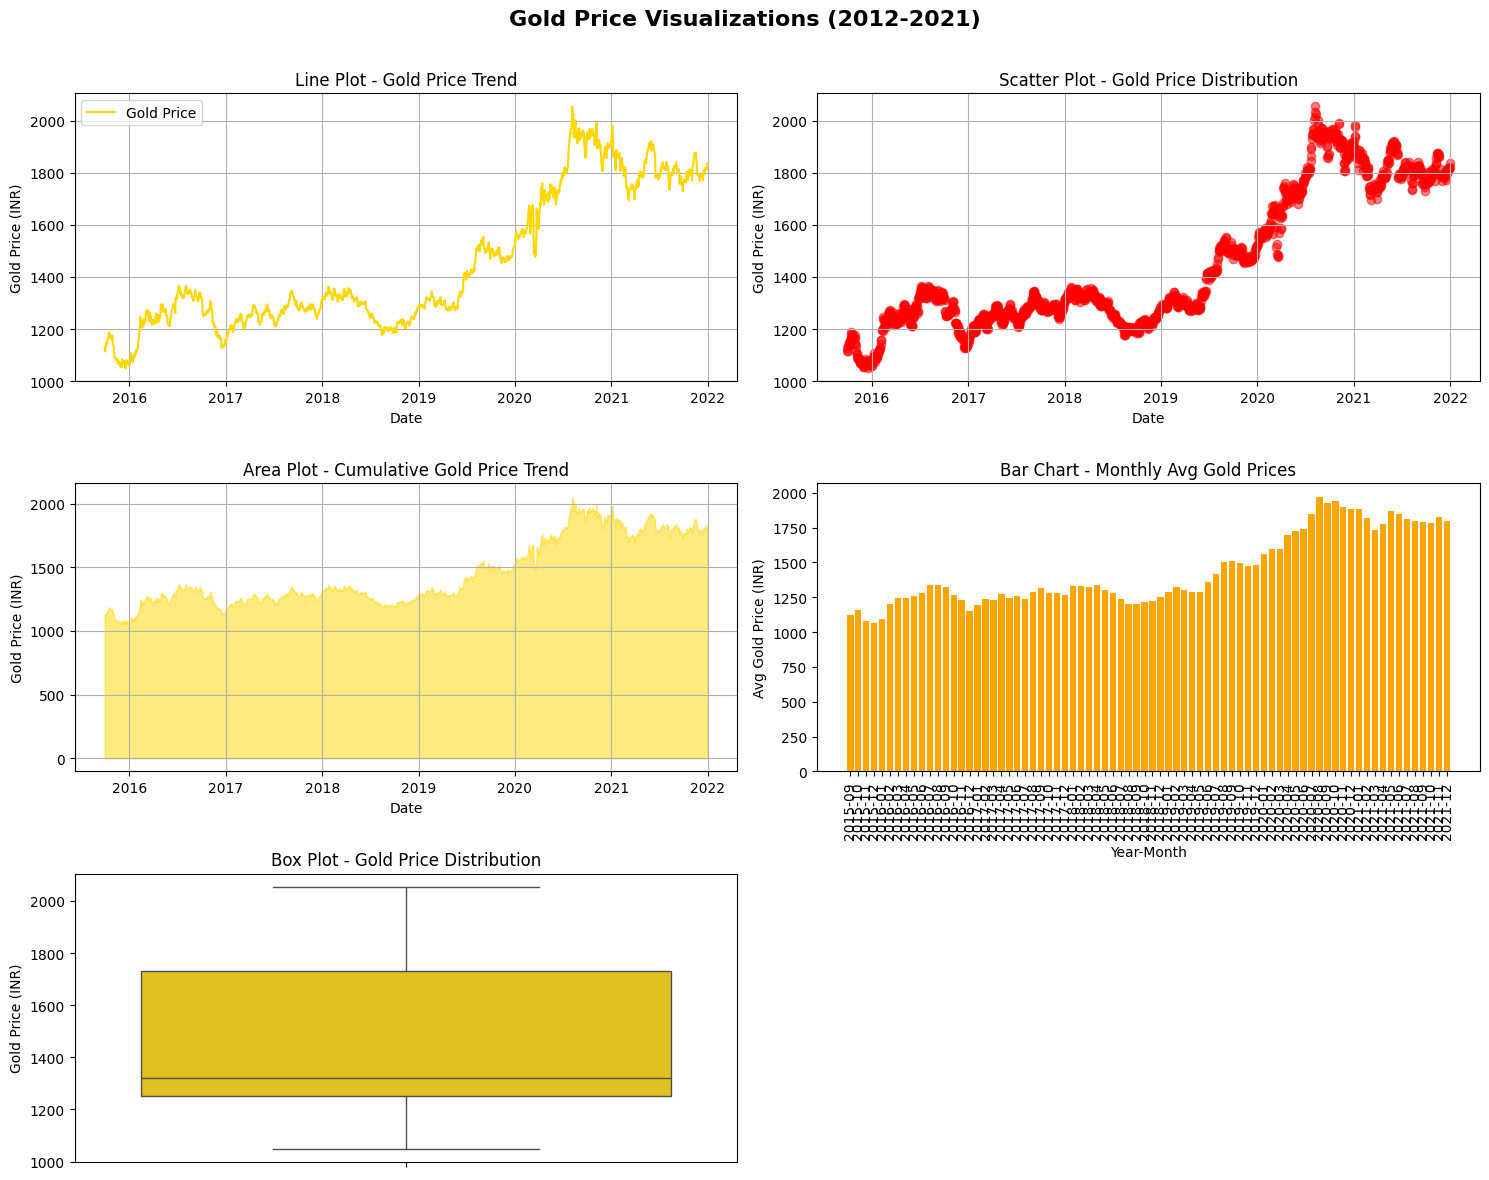

Column names in dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume'], dtype='object')


<ipython-input-3-1e011e39d113>:81: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


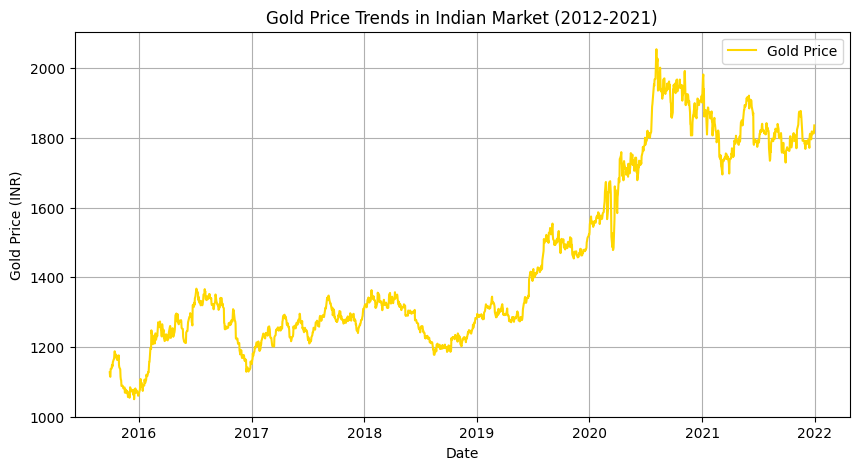

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/gold_data.csv")

print("Column names in dataset:", df.columns)


date_col = "Date"  # Change if needed
gold_price_col = "Price"  # Update based on actual column name


df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


df = df[(df[date_col].dt.year >= 2012) & (df[date_col].dt.year <= 2021)]

df = df.sort_values(by=date_col)

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Gold Price Visualizations (2012-2021)", fontsize=16, fontweight="bold")

# Line Plot
axes[0, 0].plot(df[date_col], df[gold_price_col], color='gold', label="Gold Price")
axes[0, 0].set_title("Line Plot - Gold Price Trend")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Gold Price (INR)")
axes[0, 0].legend()
axes[0, 0].grid()

# Scatter Plot
axes[0, 1].scatter(df[date_col], df[gold_price_col], color='red', alpha=0.5)
axes[0, 1].set_title("Scatter Plot - Gold Price Distribution")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Gold Price (INR)")
axes[0, 1].grid()

# Area Plot
axes[1, 0].fill_between(df[date_col], df[gold_price_col], color="gold", alpha=0.5)
axes[1, 0].set_title("Area Plot - Cumulative Gold Price Trend")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Gold Price (INR)")
axes[1, 0].grid()

# Bar Chart (Monthly Average Prices)
df["Year-Month"] = df[date_col].dt.to_period("M")
monthly_avg = df.groupby("Year-Month")[gold_price_col].mean()
axes[1, 1].bar(monthly_avg.index.astype(str), monthly_avg, color='orange')
axes[1, 1].set_title("Bar Chart - Monthly Avg Gold Prices")
axes[1, 1].set_xlabel("Year-Month")
axes[1, 1].set_ylabel("Avg Gold Price (INR)")
axes[1, 1].tick_params(axis='x', rotation=90)

# Box Plot (Detect Outliers)
sns.boxplot(y=df[gold_price_col], ax=axes[2, 0], color='gold')
axes[2, 0].set_title("Box Plot - Gold Price Distribution")
axes[2, 0].set_ylabel("Gold Price (INR)")

# Hide extra subplot
axes[2, 1].axis("off")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

df = pd.read_csv("/content/gold_data.csv")

# Print column names to verify
print("Column names in dataset:", df.columns)

# Convert Date column to datetime (update the column name based on your dataset)
date_col = "Date"  # Change if your date column has a different name
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Check if 'Gold Price' exists, otherwise update with the correct column name
gold_price_col = "Price"  # Change based on actual column name from print(df.columns)

# Filter data for years (2012-2021)
df = df[(df[date_col].dt.year >= 2012) & (df[date_col].dt.year <= 2021)]

# Remove Outliers (Using IQR Method)
Q1 = df[gold_price_col].quantile(0.25)
Q3 = df[gold_price_col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[gold_price_col] >= (Q1 - 1.5 * IQR)) & (df[gold_price_col] <= (Q3 + 1.5 * IQR))]

# Plot Gold Prices Over Time
plt.figure(figsize=(10, 5))
plt.plot(df[date_col], df[gold_price_col], color='gold', label="Gold Price")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.title("Gold Price Trends in Indian Market (2012-2021)")
plt.legend()
plt.grid()
plt.show()
